In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 48 kB 2.6 MB/s 
     |████████████████████████████████| 1.2 MB 58.1 MB/s 
     |████████████████████████████████| 189 kB 65.9 MB/s 
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 558 kB 45.6 MB/s 
     |████████████████████████████████| 51 kB 308 kB/s 
     |████████████████████████████████| 130 kB 65.7 MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *
import matplotlib.pyplot as plt

In [4]:
data_path = Path('/content/gdrive/MyDrive/ENEL 400/Data/')
data_types = ['Ambulance_spec','Other_spec']

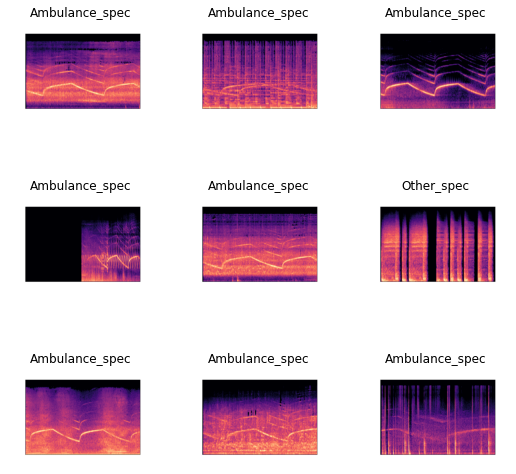

In [5]:
specs = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.15, seed=53),
                   get_y=parent_label)

dls = specs.dataloaders(data_path)
dls.train.show_batch()